In [74]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import torch.optim as optim
from DataLoading import mnistLoader
%matplotlib inline

In [75]:


data_loader = mnistLoader()
train_loader, val_loader = data_loader.train_val_loader(16, 16, shuffle=True, split = 0.8, ratio = 0.2)
test_loader = data_loader.test_loader(16, shuffle=False, ratio = 1)

torch.Size([16, 1, 28, 28])
torch.Size([16])
torch.Size([16, 1, 28, 28])


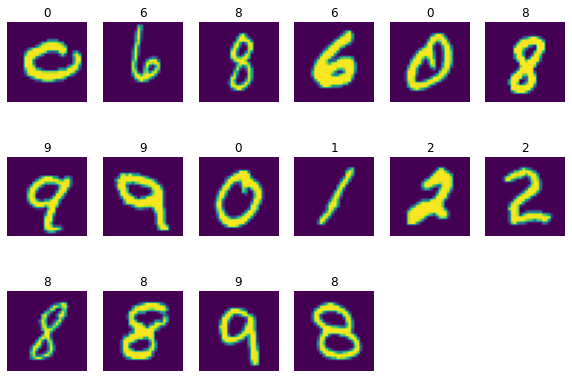

In [76]:
iterator = iter(train_loader)
batch = next(iterator)
x, y = batch
print(x.shape)
print(y.shape)
data_loader.visualize(x, y)


(28, 28)


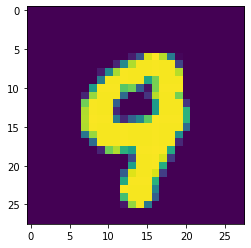

In [71]:
image = x[0].squeeze().numpy()
print(image.shape)
plt.imshow(image)

In [77]:

class mnistCNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.convLayer = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, dilation=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(6, 12, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        self.linerLayer = nn.Sequential(
            nn.Linear(1728, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        x = self.convLayer(x)
        x = x.view(-1, 1728)
        x = self.linerLayer(x)
        return x

        


In [82]:
model = mnistCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
max_epochs = 15 
from Trainer import trainer

model_trainer = trainer(model, optimizer, loss_fn, train_loader, val_loader, max_epochs, path= '/mnistCNN')



TypeError: __init__() got an unexpected keyword argument 'path'

In [19]:
model_trainer.fit()


1.688515543937683  ,  1.6883256435394287
1.6354267597198486  ,  1.6362980604171753


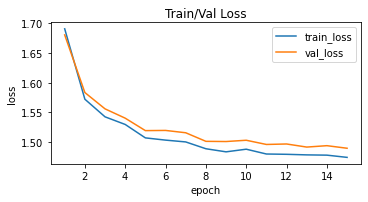

In [9]:
model_trainer.plot()

In [61]:
def visualize(batch):
    x, y = batch
    logits = model(x)
    labels = torch.argmax(logits, dim=1)
    print('predicted labels: ',labels)
    print('True labels: ', y)
    x = x/2 + 0.5
    correct_prediction = (labels == y)
    print("Accuracy :", (correct_prediction.sum()/x.shape[0]).item())
    fig = plt.figure(figsize=(10,7))
    for i in range(x.shape[0]):
        fig.add_subplot(3,int(x.shape[0]/3) + 1, i+1)
        image = torch.squeeze(x[i]).numpy() 
        plt.imshow(image)
        plt.axis('off')
        plt.title(labels[i].item())

    plt.show()

predicted labels:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 3])
True labels:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5])
Accuracy : 0.875


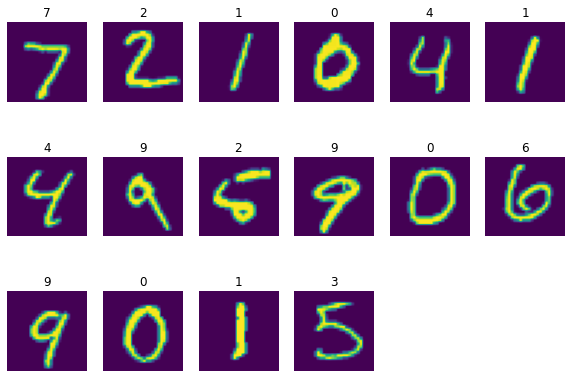

predicted labels:  tensor([9, 7, 6, 4, 7, 6, 6, 3, 4, 0, 7, 4, 0, 1, 3, 1])
True labels:  tensor([9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1])
Accuracy : 0.8125


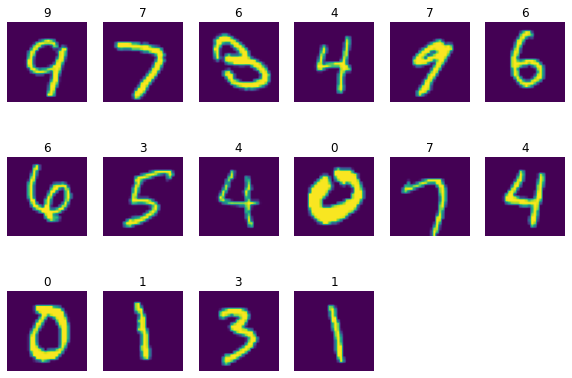

predicted labels:  tensor([3, 6, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 3, 3, 2])
True labels:  tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2])
Accuracy : 0.75


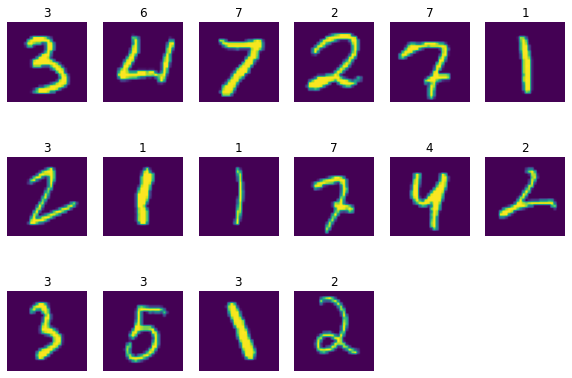

predicted labels:  tensor([4, 4, 6, 3, 9, 3, 6, 0, 4, 1, 9, 7, 7, 8, 9, 3])
True labels:  tensor([4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
Accuracy : 0.8125


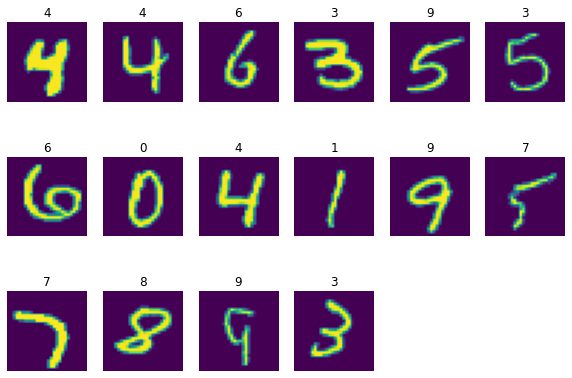

predicted labels:  tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 7, 9, 7])
True labels:  tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7])
Accuracy : 0.875


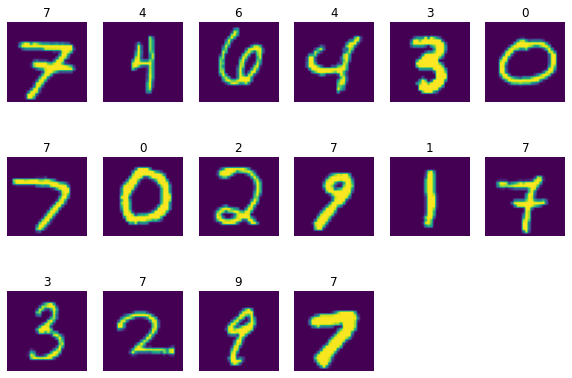

In [62]:
iterator = iter(test_loader)
for i in range(5):
    batch = iterator.next()
    visualize(batch)